## Project: House Price Prediction

##### Problem Statement:

Accurately predicting the selling price of a house is a crucial challenge in the real estate industry. Various factors influence house prices, including location, size, number of rooms, age of the property, and more.

The goal of my project is to develop a machine learning model that can predict the price of residential houses based on a variety of input features. This predictive model will help buyers, sellers, and real estate professionals make informed decisions.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
from scipy import stats



In [31]:
# Reading Dataset
house_data=pd.read_csv("C:\\Users\\Manikanta\\Downloads\\House price data.csv")

In [33]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [35]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [37]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [39]:
house_data.shape

(4600, 18)

# Exploratory Data Analysis

In [42]:
house_data['date'].nunique()

70

In [44]:
house_data.drop(columns=['date','street','statezip'],axis=1,inplace=True)

In [46]:
house_data.duplicated().sum()

0

## UniVariate Analysis

In [52]:
house_data['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [54]:
house_data['price'].min()

0.0

In [56]:
house_data['price'].max()

26590000.0

The minimum house price in the given data is 0.0.It means that specified are not fit for sold.  

C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\1858576111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=house_data, ax=axis[0], palette='pastel', edgecolor='black')


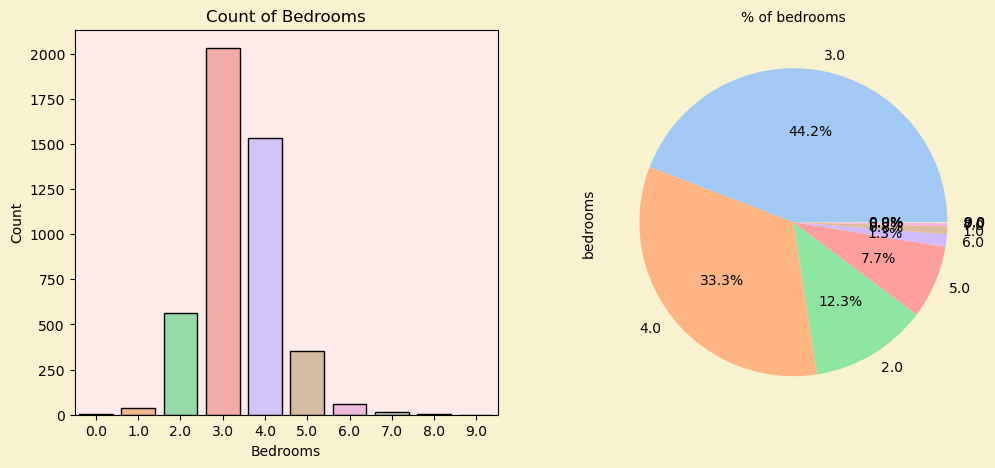

In [59]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('#F8F3CE')  
sns.countplot(x='bedrooms', data=house_data, ax=axis[0], palette='pastel', edgecolor='black')
axis[0].set_title("Count of Bedrooms")
axis[0].set_xlabel("Bedrooms")
axis[0].set_ylabel("Count")
axis[0].set_facecolor('#FFEAEA') 
fdt_bedrooms=house_data['bedrooms'].value_counts()
plt.pie(fdt_bedrooms.values,autopct='%.1f%%',labels=fdt_bedrooms.index, colors=sns.color_palette('pastel') )
plt.ylabel('bedrooms',fontsize=10)
plt.title('% of bedrooms',fontsize=10)
plt.show()

Here,mostly there are either 3 bedrooms or 4 bedrooms houses are present in the dataset

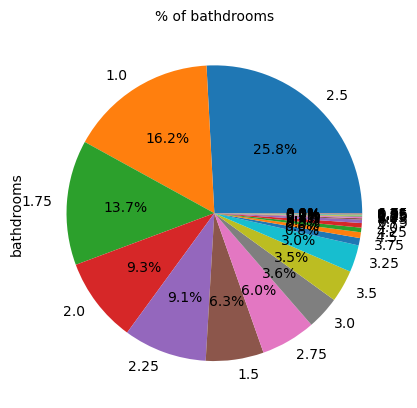

In [62]:
fdt_bathrooms=house_data['bathrooms'].value_counts()
plt.pie(fdt_bathrooms.values,autopct='%.1f%%',labels=fdt_bathrooms.index, )
plt.ylabel('bathdrooms',fontsize=10)
plt.title('% of bathdrooms',fontsize=10)
plt.show()

By above plot,there are very few houses with more tahn 2 bathrooms are present

In [65]:
axis=sns.distplot(x=house_data['sqft_living'],hist=True,bins=30,color='green',hist_kws={'edgecolor':'black'})
axis.set_title("Distribution of sqft_living", fontsize=13)
axis.set_xlabel("sqft_living")
axis.grid(True, linestyle='--', alpha=0.3)


C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\2937734120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis=sns.distplot(x=house_data['sqft_living'],hist=True,bins=30,color='green',hist_kws={'edgecolor':'black'})


Most of the houses are between 300 to 4200 sqft only

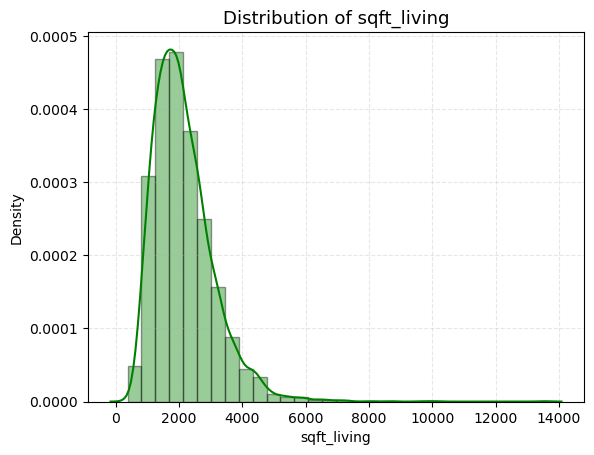

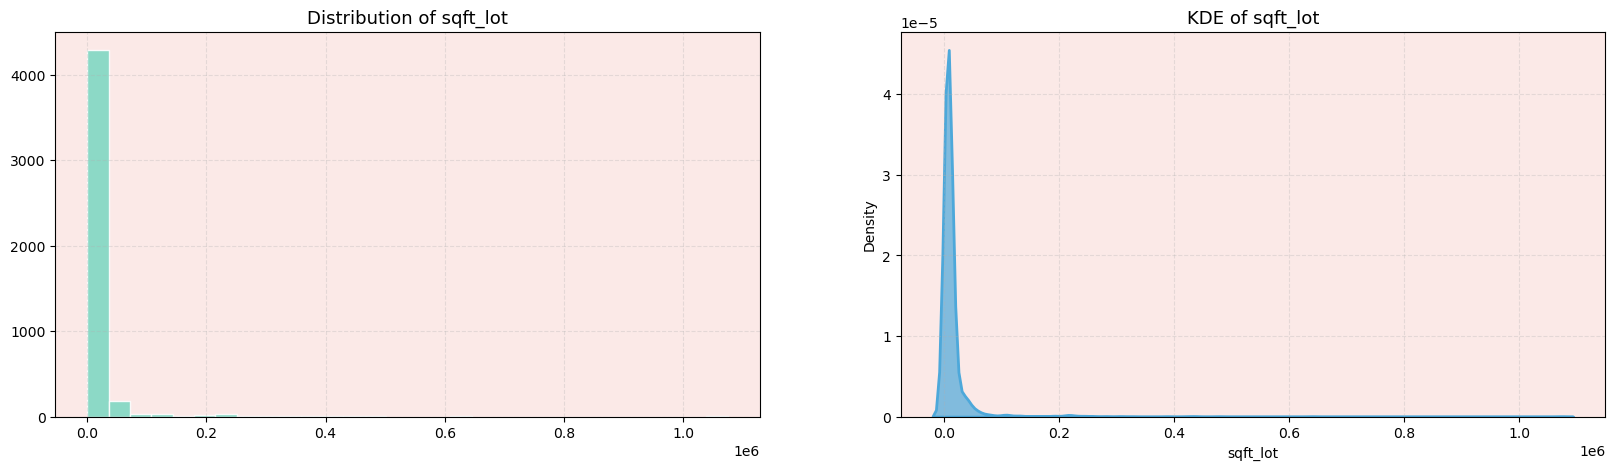

In [68]:
fig, axis = plt.subplots(1, 2, figsize=(20, 5))

# Apply background to each axis
for ax in axis:
    ax.set_facecolor('#FBE9E7')

# --- Histogram ---
axis[0].hist(house_data['sqft_lot'], bins=30, color='#80D8C3', edgecolor='white', alpha=0.9)
axis[0].set_title("Distribution of sqft_lot", fontsize=13)
axis[0].grid(True, linestyle='--', alpha=0.3)

# --- KDE Plot ---
sns.kdeplot(house_data['sqft_lot'], ax=axis[1], fill=True, color='#4DA8DA', alpha=0.7, linewidth=2)
axis[1].set_title("KDE of sqft_lot",  fontsize=13)
axis[1].grid(True, linestyle='--', alpha=0.3)
plt.show()

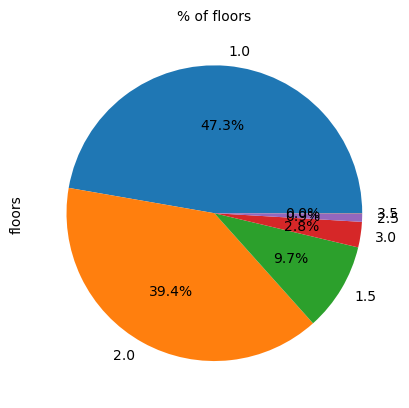

In [69]:
fdt_floors=house_data['floors'].value_counts()
plt.pie(fdt_floors.values,autopct='%.1f%%',labels=fdt_floors.index, )
plt.ylabel('floors',fontsize=10)
plt.title('% of floors',fontsize=10)
plt.show()

Here, about 47.3 % houses are single floor and 39.4 % are double floor .And very few houses are more than 2 floors  

In [73]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('#FFDAB9')  # Peach Puff background
# Count Plot
sns.countplot(x='waterfront', data=house_data, ax=axis[0], palette='pastel', edgecolor='black')
axis[0].set_title("Distribution of Waterfront")
axis[0].set_xlabel("Waterfront")
axis[0].set_facecolor('#FFF5E1')
sns.countplot(x='view', data=house_data, ax=axis[1], palette='pastel', edgecolor='black')
axis[1].set_title("Distribution of view")
axis[1].set_xlabel("view")
axis[1].set_facecolor('#FFF5E1')
sns.countplot(x='condition', data=house_data, ax=axis[2], palette='pastel', edgecolor='black')
axis[2].set_title("Distribution of city")
axis[2].set_xlabel("condition")
axis[2].set_facecolor('#FFF5E1')





C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\1244909216.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='waterfront', data=house_data, ax=axis[0], palette='pastel', edgecolor='black')
C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\1244909216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='view', data=house_data, ax=axis[1], palette='pastel', edgecolor='black')
C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\1244909216.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=house_data, ax

In [74]:
axis=sns.distplot(x=house_data['yr_built'],hist=True,bins=30,color='blue',hist_kws={'edgecolor':'black'})
axis.set_title("Distribution of houses by builted year", fontsize=13)
axis.set_xlabel("year_built")
axis.grid(True, linestyle='--', alpha=0.3)


C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\2546502681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis=sns.distplot(x=house_data['yr_built'],hist=True,bins=30,color='blue',hist_kws={'edgecolor':'black'})


There are many houses are built between year 1940 to 2012.By these the construction of houses are increasing quickly.

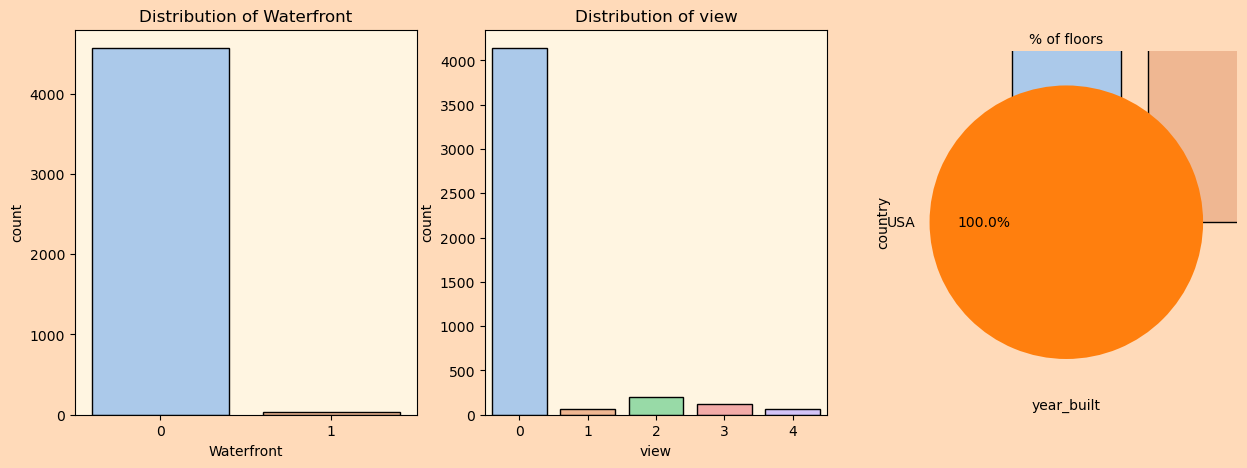

In [78]:
fdt_floors=house_data['country'].value_counts()
plt.pie(fdt_floors.values,autopct='%.1f%%',labels=fdt_floors.index, )
plt.ylabel('country',fontsize=10)
plt.title('% of floors',fontsize=10)
plt.show()

Here,the entire data is from various cities of USA

In [81]:
ax=sns.distplot(house_data['sqft_above'],hist=True,kde=False,bins=25,color='turquoise',
                hist_kws={'edgecolor':'black'},kde_kws={'linewidth':5})
ax.set_xlabel("sqft")
ax.set_title("square feet")

C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\899252355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(house_data['sqft_above'],hist=True,kde=False,bins=25,color='turquoise',


Text(0.5, 1.0, 'square feet')

By the above plot,there are most of the houses are above 700 sqft,a very few are below 200 sqft.

### BI-VARIATE Analysis

In [85]:
house_data[['bedrooms', 'sqft_living']].plot.scatter(y='bedrooms',x='sqft_living')

<Axes: xlabel='sqft_living', ylabel='bedrooms'>

The houses of below 1000 sqft are single bedrooms ,and below 3000 sqft are double or triple bedrooms ,and above 3000 sqft has more than 3 bedrooms

In [88]:
pd.crosstab(house_data['view'],house_data['condition']).plot(kind='bar')

<Axes: xlabel='view'>

Moderate condition houses has highest view ratings than low and high condition houses.Because moderate condition houses has medium price which helps more people willing to buy.Whereas low condition houses are inhabitant and high condition houses has high prices,most people are not afford to buy.

C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\3851388185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='floors', y='price', data=floor_price,palette='viridis')


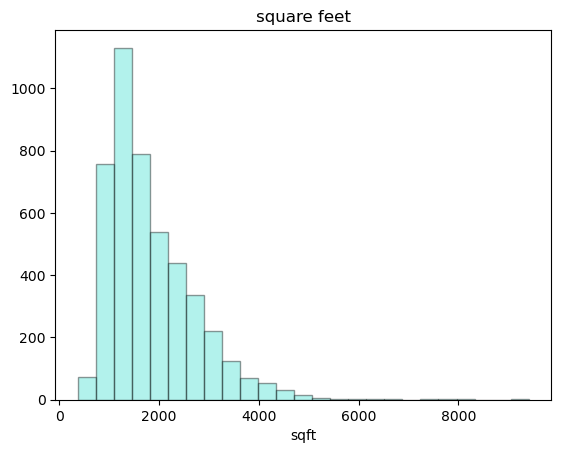

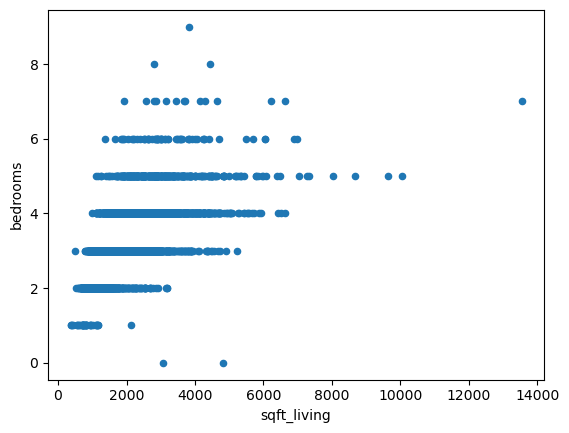

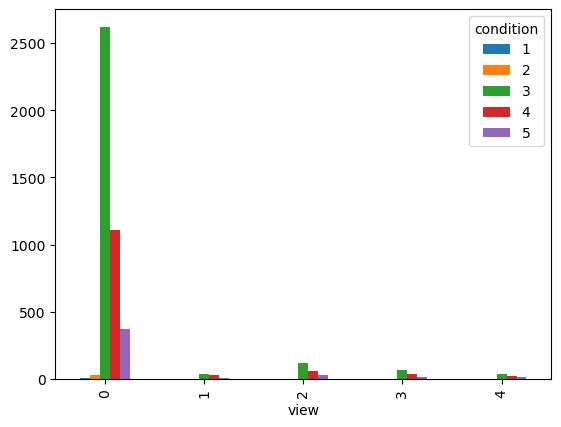

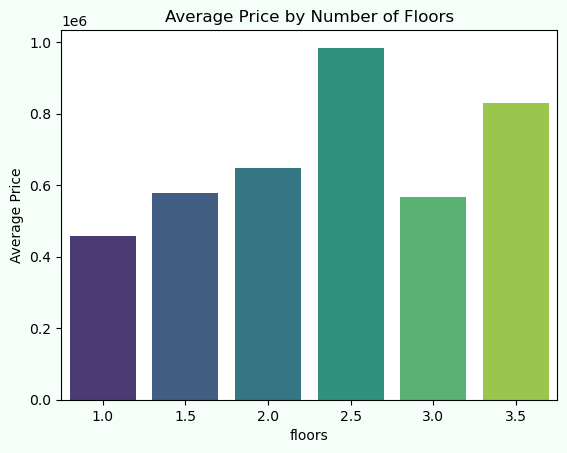

In [91]:
floor_price = house_data.groupby('floors')['price'].mean().reset_index()

plt.figure(facecolor='mintcream')
sns.barplot(x='floors', y='price', data=floor_price,palette='viridis')
plt.title('Average Price by Number of Floors')
plt.ylabel('Average Price')
plt.show()

Having more floors increases the price.Compared to single floor having double and triple floors houses has high prices

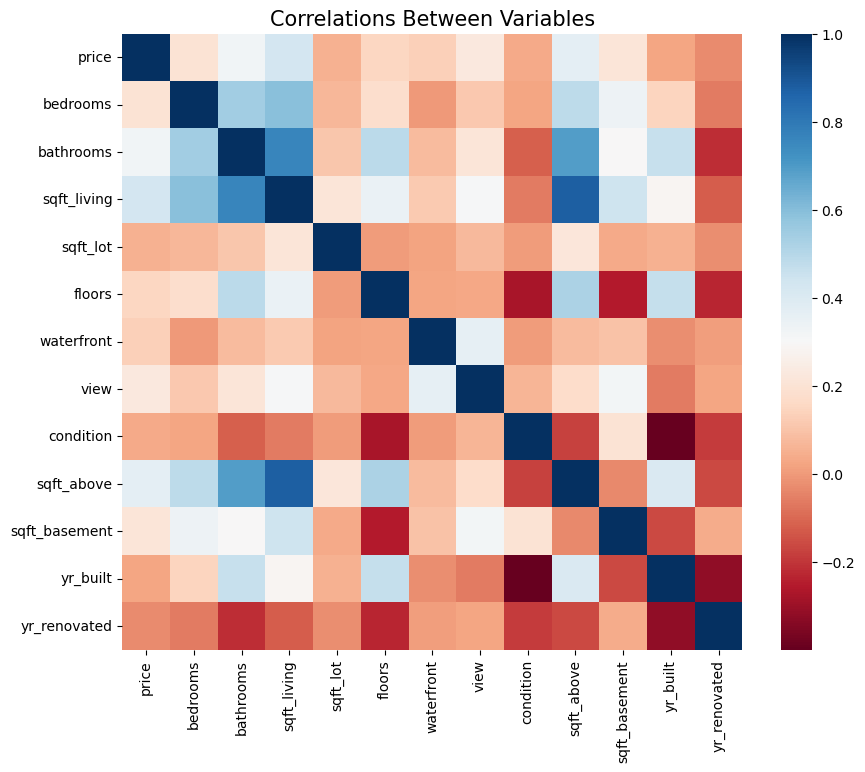

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(house_data.corr(numeric_only=True), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

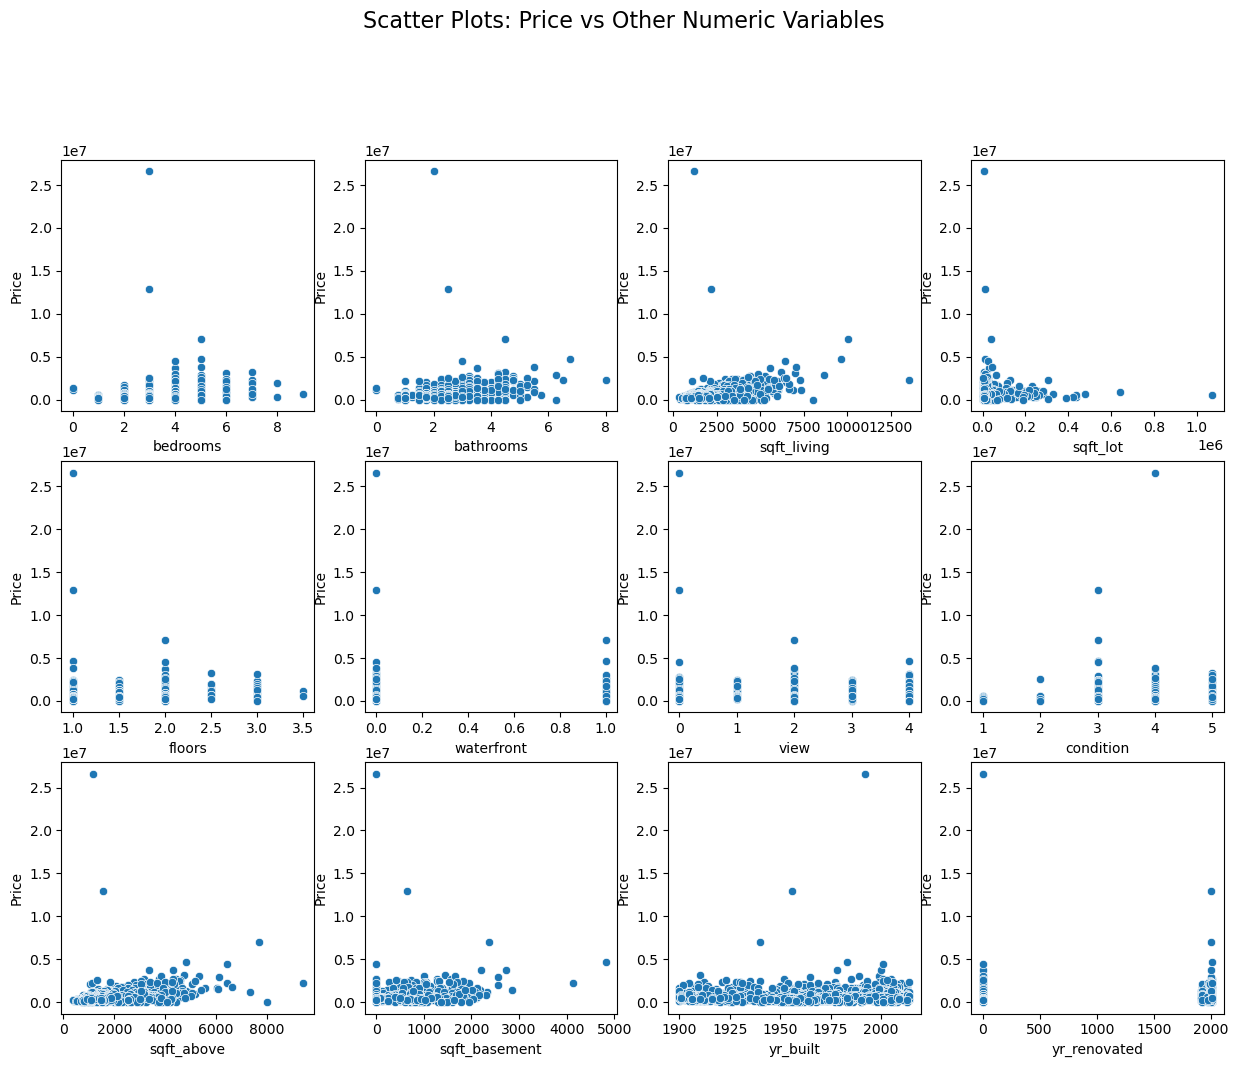

In [95]:
i = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle("Scatter Plots: Price vs Other Numeric Variables", fontsize=16)

for col in house_data.columns:
    if house_data[col].dtype != 'object' and col != 'price':
        row = i // 4
        col_pos = i % 4
        axis = ax[row, col_pos]
        
        sns.scatterplot(data=house_data, x=col, y='price', ax=axis)
        axis.set_xlabel(col)
        axis.set_ylabel('Price')
        
        i += 1


for j in range(i, 16):
    row = j // 4
    col_pos = j % 4
    fig.delaxes(ax[row, col_pos])
    
plt.show()


In [96]:
pd.crosstab(house_data['city'],house_data['country']).plot(kind='bar')
plt.ylabel('country')
plt.title('Houses in various cities',size=15)
plt.legend(loc='right',prop={'size':10},title='country')

In USA,the city Seattle has many houses comparing to remaining cities

### Missing values

In [100]:
# Finging missing values
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
country          0
dtype: int64

The data has zero missing values

In [102]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


### Feature Engineering

In [104]:
house_data['price_per_sqft'] = house_data.apply(lambda x: x['price'] / x['sqft_living'] if x['sqft_living'] != 0 else 0, axis=1)


In [106]:
house_data['total_sqft'] = house_data['sqft_above'] + house_data['sqft_basement']
house_data['age_when_renovated'] = house_data.apply(lambda x: x['yr_renovated'] - x['yr_built'] if x['yr_renovated'] > 0 else 0, axis=1)

In [112]:
house_data['total_rooms'] = house_data['bedrooms'] + house_data['bathrooms']


C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\318762620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sqft', y='price', data=sqft_price,palette='viridis')


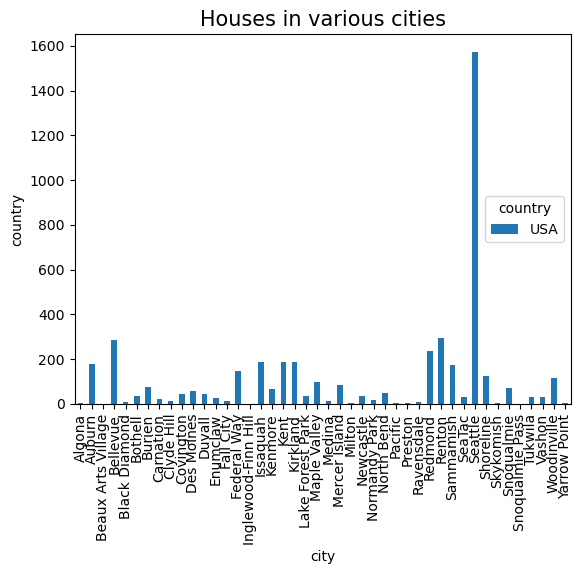

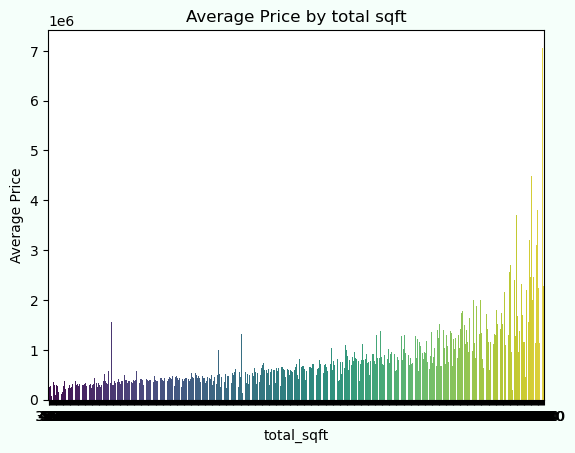

In [114]:
sqft_price = house_data.groupby('total_sqft')['price'].mean().reset_index()

plt.figure(facecolor='mintcream')
sns.barplot(x='total_sqft', y='price', data=sqft_price,palette='viridis')
plt.title('Average Price by total sqft')
plt.ylabel('Average Price')
plt.show()

C:\Users\Manikanta\AppData\Local\Temp\ipykernel_7948\3952483783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_rooms', y='price', data=total_rooms_price,palette='viridis')


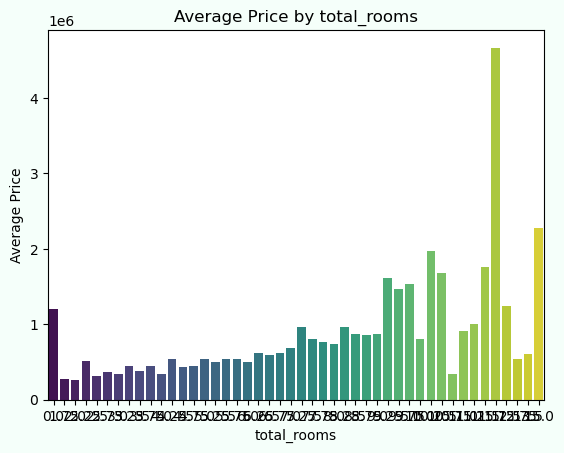

In [115]:
total_rooms_price = house_data.groupby('total_rooms')['price'].mean().reset_index()

plt.figure(facecolor='mintcream')
sns.barplot(x='total_rooms', y='price', data=total_rooms_price,palette='viridis')
plt.title('Average Price by total_rooms')
plt.ylabel('Average Price')
plt.show()

### Outliers

In [117]:
# Boxplot helps to identify outliers
house_data.boxplot()

<Axes: >

In [118]:
thershold=3
z_score=stats.zscore(house_data[['price','sqft_lot']])

In [119]:
mask=(np.abs(z_score)<thershold).all(axis=1)

In [120]:
print(house_data.shape)
print(mask.sum())
print(house_data.shape[0]-mask.sum())

(4600, 19)
4489
111


The dataset has few outliers which are less than 10% of the whole data.So we can ignore the outliers,it doesn't affect the predictions .

### Encoding

In [123]:
# Converting categorical data into numerical because model doesn't understand categorical data
from sklearn.preprocessing import LabelEncoder
cust_enc=LabelEncoder()
#vend_enc=LabelEncoder()
house_data['city'] = cust_enc.fit_transform(house_data['city'] )
house_data['country']  = cust_enc.fit_transform(house_data['country'] )

In [124]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,price_per_sqft,total_sqft,age_when_renovated,total_rooms
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,0,233.582090,1340,50,4.50
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,0,653.150685,3650,0,7.50
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,0,177.202073,1930,0,5.00
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,0,210.000000,2000,0,5.25
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,0,283.505155,1940,16,6.50


In [125]:
# Splitting data into train,test sets
from sklearn.model_selection import train_test_split
X = house_data.drop(columns=['price'])
y =house_data['price']                   
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [126]:
X.shape

(4600, 18)

In [127]:
y.shape

(4600,)

### Data Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler
features=X_train.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))
X_train.columns=features

In [130]:
X_test=pd.DataFrame(scaler.transform(X_test))
X_test.columns=features

# Model Building

In [132]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Enable diagram display
set_config(display='diagram')

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "SVR": SVR()
}

# Store pipelines
pipelines = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('model', model)
    ])
    print(f"🔽 Pipeline for: {name}")
    display(pipe)  # Only works in Jupyter
    pipelines.append((name, pipe))

🔽 Pipeline for: LinearRegression


Pipeline(steps=[('model', LinearRegression())])

🔽 Pipeline for: Ridge


Pipeline(steps=[('model', Ridge())])

🔽 Pipeline for: Lasso


Pipeline(steps=[('model', Lasso())])

🔽 Pipeline for: ElasticNet


Pipeline(steps=[('model', ElasticNet())])

🔽 Pipeline for: DecisionTree


Pipeline(steps=[('model', DecisionTreeRegressor())])

🔽 Pipeline for: RandomForest


Pipeline(steps=[('model', RandomForestRegressor())])

🔽 Pipeline for: GradientBoosting


Pipeline(steps=[('model', GradientBoostingRegressor())])

🔽 Pipeline for: AdaBoost


Pipeline(steps=[('model', AdaBoostRegressor())])

🔽 Pipeline for: KNeighbors


Pipeline(steps=[('model', KNeighborsRegressor())])

🔽 Pipeline for: SVR


Pipeline(steps=[('model', SVR())])

## ---------   Validation of Models  ----------

In [134]:
from sklearn.metrics import r2_score, mean_squared_error
# Evaluate each model
for name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ('model', model)])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    print(f"{name} -> R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

LinearRegression -> R²: 0.4889, MSE: 430493240793.7756, RMSE: 656119.8372
Ridge -> R²: 0.6134, MSE: 325599520956.2288, RMSE: 570613.2849
Lasso -> R²: 0.4891, MSE: 430345518843.3318, RMSE: 656007.2552
ElasticNet -> R²: 0.0411, MSE: 807705169870.9009, RMSE: 898724.1901


C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+13, tolerance: 4.927e+10
  model = cd_fast.enet_coordinate_descent(


DecisionTree -> R²: 0.1742, MSE: 695619433890.8441, RMSE: 834038.0290
RandomForest -> R²: 0.1854, MSE: 686158828431.7566, RMSE: 828347.0459
GradientBoosting -> R²: 0.2286, MSE: 649734246716.4323, RMSE: 806060.9448
AdaBoost -> R²: 0.1506, MSE: 715441571625.5677, RMSE: 845837.7927
KNeighbors -> R²: 0.1494, MSE: 716443970849.4696, RMSE: 846430.1335
SVR -> R²: -0.0146, MSE: 854608388445.6969, RMSE: 924450.3169


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
for name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ('model', model)])

    r2_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')
    print(f"🔹 {name} - Cross-validated R² scores: {r2_scores}")
    print(f"🔹 {name} - Mean R²: {r2_scores.mean():.4f}")

    y_pred_cv = cross_val_predict(model_pipeline, X, y, cv=5)
    rmse_cv = mean_squared_error(y, y_pred_cv) ** 0.5
    print(f"🔹 {name} - Cross-validated RMSE: {rmse_cv:.4f}")
    print("-" * 60)

🔹 LinearRegression - Cross-validated R² scores: [0.86040631 0.83980217 0.81192016 0.84910375 0.56621448]
🔹 LinearRegression - Mean R²: 0.7855
🔹 LinearRegression - Cross-validated RMSE: 329971.5845
------------------------------------------------------------
🔹 Ridge - Cross-validated R² scores: [0.8603283  0.83996294 0.81169791 0.84928482 0.56548741]
🔹 Ridge - Mean R²: 0.7854
🔹 Ridge - Cross-validated RMSE: 330204.8299
------------------------------------------------------------


C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.608e+13, tolerance: 1.364e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.353e+13, tolerance: 1.345e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.871e+

🔹 Lasso - Cross-validated R² scores: [0.86040371 0.83980448 0.8119121  0.84910695 0.56620622]
🔹 Lasso - Mean R²: 0.7855


C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.353e+13, tolerance: 1.345e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.871e+13, tolerance: 1.302e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.412e+

🔹 Lasso - Cross-validated RMSE: 329974.5190
------------------------------------------------------------


C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.940e+13, tolerance: 1.302e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.577e+13, tolerance: 1.345e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+

🔹 ElasticNet - Cross-validated R² scores: [0.85456168 0.83934051 0.80303387 0.84792973 0.53930801]
🔹 ElasticNet - Mean R²: 0.7768


C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.940e+13, tolerance: 1.302e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.577e+13, tolerance: 1.345e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Manikanta\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+

🔹 ElasticNet - Cross-validated RMSE: 339159.2132
------------------------------------------------------------


## Geting the model having best metrics

In [ ]:
models = [
    "LinearRegression", "Ridge", "Lasso", "ElasticNet", "DecisionTree",
    "RandomForest", "GradientBoosting", "AdaBoost", "KNeighbors", "SVR"
]

mean_r2_scores = [0.8861, 0.8937, 0.8936, 0.8369, 0.9560, 0.9725, 0.9727, 0.8500, 0.7365, -0.0497]
rmse_scores = [107090.1704, 103327.6749, 103393.9934, 126895.2001, 66765.4290, 
               55792.0778, 54121.1225, 124210.8113, 160928.4809, 319506.4684]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart for R²
bar1 = ax1.bar(x - width/2, mean_r2_scores, width, label='Mean R²', color='skyblue')
ax1.set_ylabel('Mean R² Score')
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Model Performance: Mean R² and RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend(loc='upper left')

# Secondary axis bar chart for RMSE
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, rmse_scores, width, label='CV RMSE', color='green')
ax2.set_ylabel('Cross-Validated RMSE')
ax2.legend(loc='upper right')

fig.patch.set_facecolor('#fffaf0')  # Light background

plt.tight_layout()
plt.show()

### Conclusion

After testing several models for house price prediction, I found that the linear models—Linear Regression, Ridge, and Lasso—performed consistently well, all with mean R² scores around 0.7855 and relatively low RMSE. These models are simple, stable, and easy to interpret, making them solid baseline choices.

However, Gradient Boosting delivered the best overall performance, with the highest mean R² of 0.8145 and the lowest RMSE (420,043). It clearly captured more complex patterns in the data compared to the other models. Random Forest also did well but showed some instability across folds particularly one with very low R²—which suggests some overfitting of the data..

Other models like Decision Tree, AdaBoost, KNN, and SVR performed poorly or inconsistently, making them unsuitable for this task. In particular, SVR resulting in negative R² scores and the highest RMSE among all models.

In conclusion, for the house price prediction task,I found Gradient Boosting is the most accurate and robust model. However, if model simplicity and interpretability are priorities, linear models like Linear Regression or Ridge are strong alternatives.